In [1]:
import zastro as z
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import glob
from uncertainties import ufloat
import numpy as np
import pandas as pd
import os
import warnings
from scipy.optimize import OptimizeWarning
import matplotlib.gridspec as gridspec

In [92]:
def fitter(filename):
    def F(x, A_0,
          A_1, phi_1,A_2, phi_2,A_3, phi_3,A_4, phi_4,A_5, phi_5,A_6, phi_6,freq):
        return (A_0+A_1*np.sin(2*np.pi*1*freq*x+phi_1)+
                    A_2*np.sin(2*np.pi*2*freq*x+phi_2)+
                    A_3*np.sin(2*np.pi*3*freq*x+phi_3)+
                    A_4*np.sin(2*np.pi*4*freq*x+phi_4)+
                    A_5*np.sin(2*np.pi*5*freq*x+phi_5)+
                    A_6*np.sin(2*np.pi*6*freq*x+phi_6))

    #resdict=z.csvtodict(line,skipheader=True,headers=['BJD','flux','EAPflux','fluxerror','spline'])
    
    #resdict=z.csvtodict(line,skipheader=True,headers=['BJD','flux','EAPflux','fluxerror'])

    #BJD=resdict['BJD'];
    #flux=np.asarray(resdict['flux'])#/np.asarray(resdict['spline']);
    #fluxerror=resdict['fluxerror']
    #flux=flux.tolist()
    
    
    BJD=np.genfromtxt(filename)[:,1]
    magn=np.genfromtxt(filename)[:,4]
    magnerror=np.genfromtxt(filename)[:,5]
    flux=magn ############## !!!!!!!!!!!!!!!!!!!!! #####################
    fluxerror=magnerror
    
    
    wronglines=[]

    for i, each in enumerate(np.isnan(BJD)):
        if each == True:
            wronglines.append(i)
            
    for i, each in enumerate(np.isnan(flux)):
        if each == True:
            wronglines.append(i)
            
    for i, each in enumerate(np.isnan(fluxerror)):
        if each == True:
            wronglines.append(i)
            
            
    nanBJD=[]
    for i, each in enumerate(BJD):
        for EACH in wronglines:
            if EACH!=i:
                nanBJD.append(each)
                
    nanflux=[]
    for i, each in enumerate(flux):
        for EACH in wronglines:
            if EACH!=i:
                nanflux.append(each)
                
    nanfluxerror=[]
    for i, each in enumerate(fluxerror):
        for EACH in wronglines:
            if EACH!=i:
                nanfluxerror.append(each)
    
    
    BJD=nanBJD
    flux=nanflux
    fluxerror=nanfluxerror
    
    
    #period=z.period(BJD,flux)
    period=0.5
    
    LSPfreq=1/period

    pfit, pcov=optimize.curve_fit(lambda x, _A_0, 
                                      _A_1, _phi_1,
                                      _A_2, _phi_2,
                                      _A_3, _phi_3,
                                      _A_4, _phi_4,
                                      _A_5, _phi_5,
                                      _A_6, _phi_6,_freqfit:

                                      F(x, _A_0,_A_1, _phi_1,
                                                _A_2, _phi_2,
                                                _A_3, _phi_3,
                                                _A_4, _phi_4,
                                                _A_5, _phi_5,
                                                _A_6, _phi_6,_freqfit),

                                      BJD, flux, p0=[100, 100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          LSPfreq],

                                                     sigma=ma.masked_invalid(fluxerror).data, absolute_sigma=True)

    error = [] # DEFINE LIST TO CALC ERROR
    for i in range(len(pfit)): 
        try:error.append(np.absolute(pcov[i][i])**0.5) # CALCULATE SQUARE ROOT OF TRACE OF COVARIANCE MATRIX
        except:error.append( 0.00 )     
    perr_curvefit = np.array(error)
    
    return BJD, flux, fluxerror, pfit, perr_curvefit

In [93]:
def FFF(x, a0, a, psi, resdict):
        return (a0*resdict['A_0']+
                a*resdict['A_1']*np.sin(2*np.pi*1*resdict['freqfit']*x+resdict['phi_1']+1*psi)+
                a*resdict['A_2']*np.sin(2*np.pi*2*resdict['freqfit']*x+resdict['phi_2']+2*psi)+
                a*resdict['A_3']*np.sin(2*np.pi*3*resdict['freqfit']*x+resdict['phi_3']+3*psi)+
                a*resdict['A_4']*np.sin(2*np.pi*4*resdict['freqfit']*x+resdict['phi_4']+4*psi)+
                a*resdict['A_5']*np.sin(2*np.pi*5*resdict['freqfit']*x+resdict['phi_5']+5*psi)+
                a*resdict['A_6']*np.sin(2*np.pi*6*resdict['freqfit']*x+resdict['phi_6']+6*psi))

In [94]:
lclist=glob.glob("*lc")

In [95]:
for each in lclist:

    fitter(each)
#    pd.read_csv(each, sep="\t")
#    plt.figure()
#    BJD=np.genfromtxt(each)[:,1]
#    magn=np.genfromtxt(each)[:,4]
#    plt.plot(BJD,magn)
#    plt.tight_layout()

ValueError: array must not contain infs or NaNs

In [ ]:
BJD=np.genfromtxt(each)[:,1]
magn=np.genfromtxt(each)[:,4]

In [81]:
for each in np.isnan(fluxerror):
    if each == True:
        print(each)

True


In [40]:
    filename=each
    BJD=np.genfromtxt(filename)[:,1]
    magn=np.genfromtxt(filename)[:,4]
    magnerror=np.genfromtxt(filename)[:,5]
    flux=magn ############## !!!!!!!!!!!!!!!!!!!!! #####################
    fluxerror=magnerror

In [54]:
wronglines=[]

for i, each in enumerate(np.isnan(BJD)):
    if each == True:
        wronglines.append(i)
        
for i, each in enumerate(np.isnan(flux)):
    if each == True:
        wronglines.append(i)
        
for i, each in enumerate(np.isnan(fluxerror)):
    if each == True:
        wronglines.append(i)
        
        
nanBJD=[]
for i, each in enumerate(BJD):
    for EACH in wronglines:
        if EACH!=i:
            nanBJD.append(each)
            
nanflux=[]
for i, each in enumerate(flux):
    for EACH in wronglines:
        if EACH!=i:
            nanflux.append(each)
            
nanfluxerror=[]
for i, each in enumerate(fluxerror):
    for EACH in wronglines:
        if EACH!=i:
            nanfluxerror.append(each)

In [55]:
wronglines

[874, 874]

In [60]:
nanflux=[]
for i, each in enumerate(flux):
    for EACH in wronglines:
        if EACH!=i:
            nanflux.append(each)

In [91]:
import numpy.ma as ma
ma.masked_invalid(fluxerror).data

array([0.26633, 0.23719, 0.20974, ..., 0.19245, 0.23263, 0.22262])

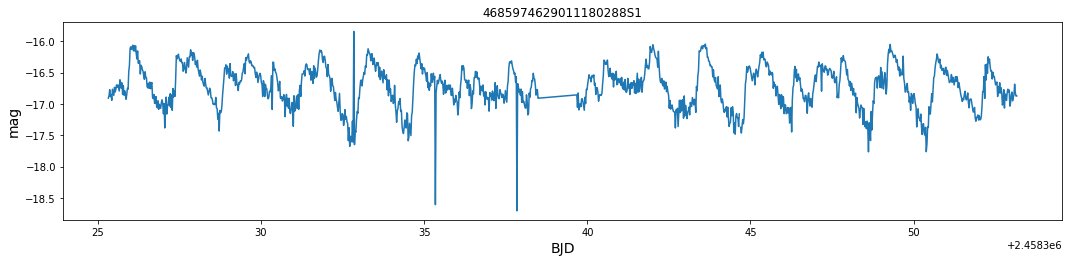

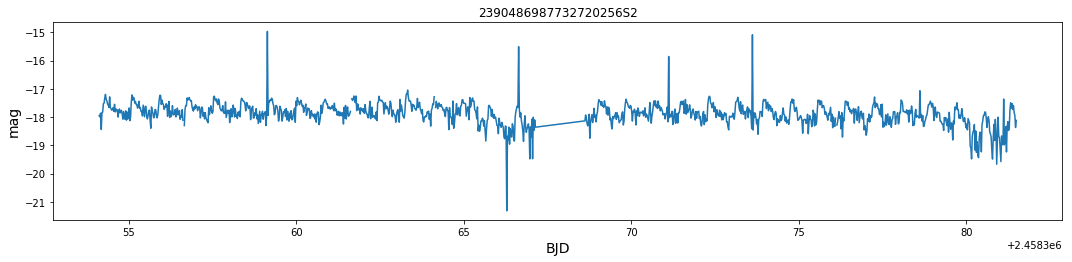

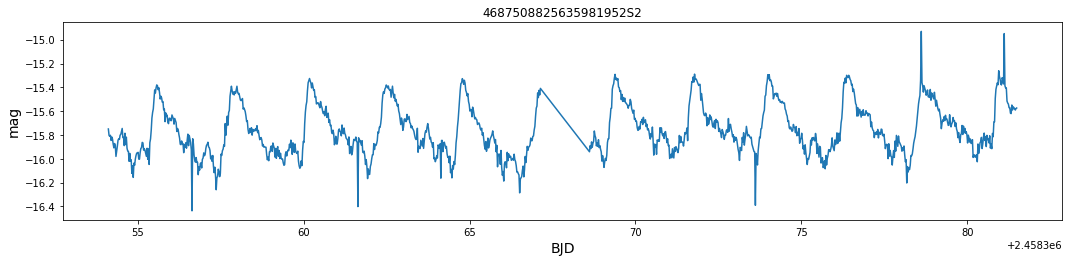

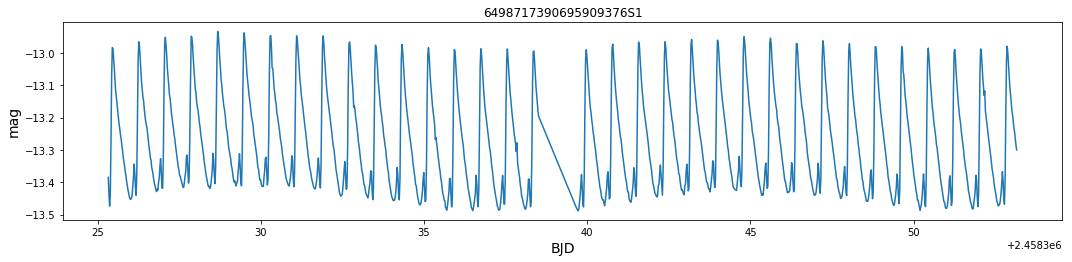

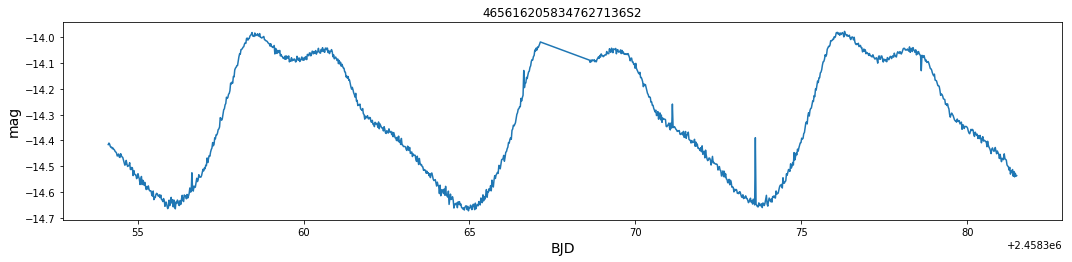

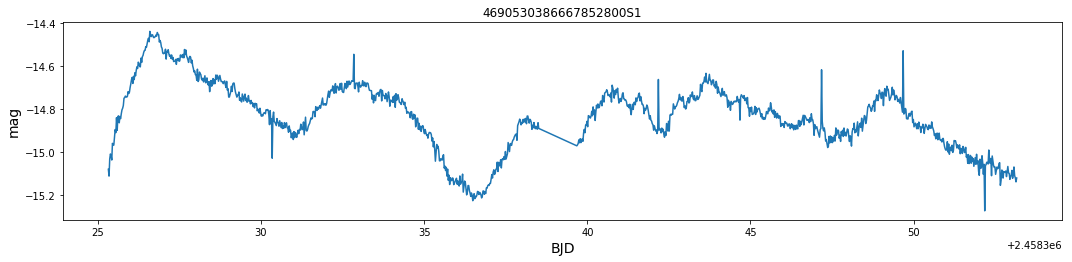

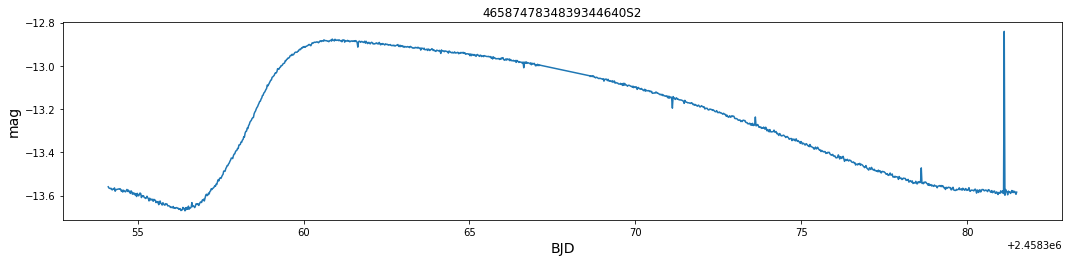

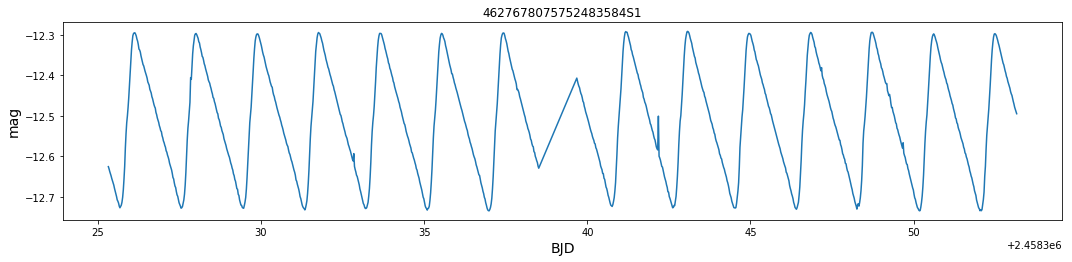

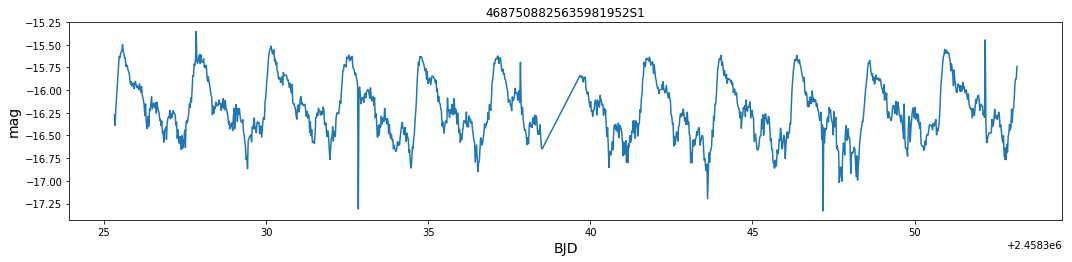

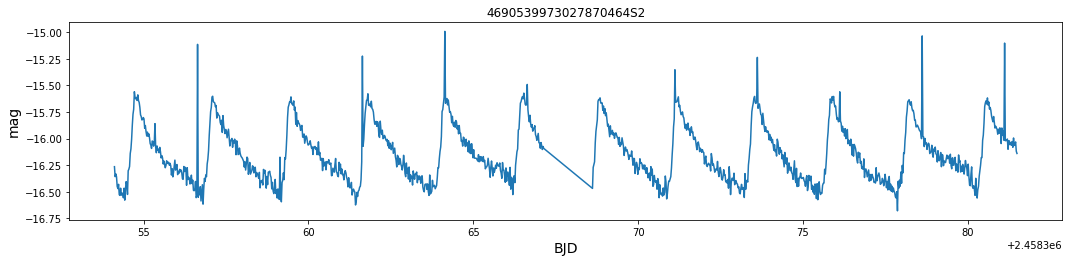

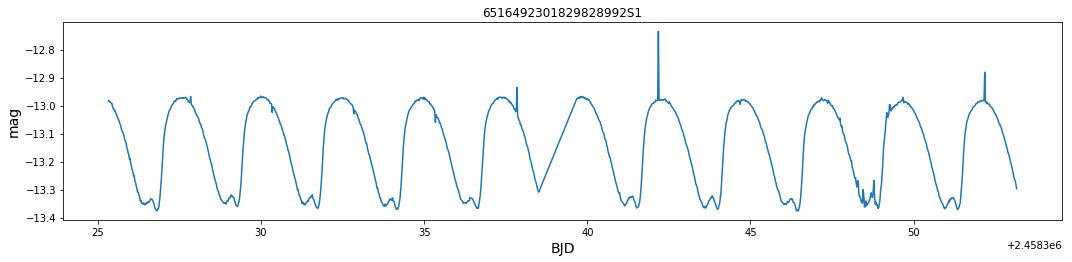

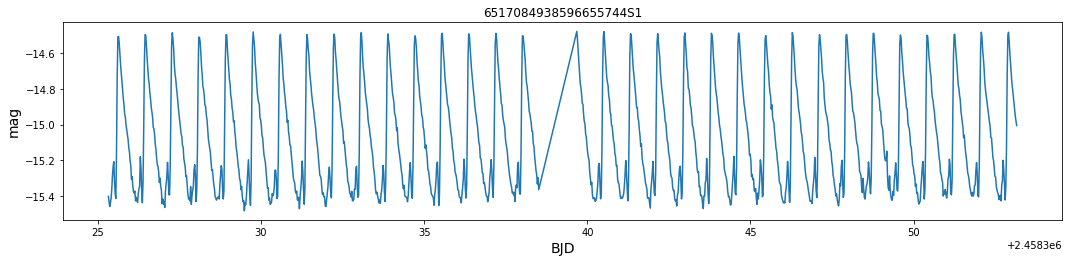

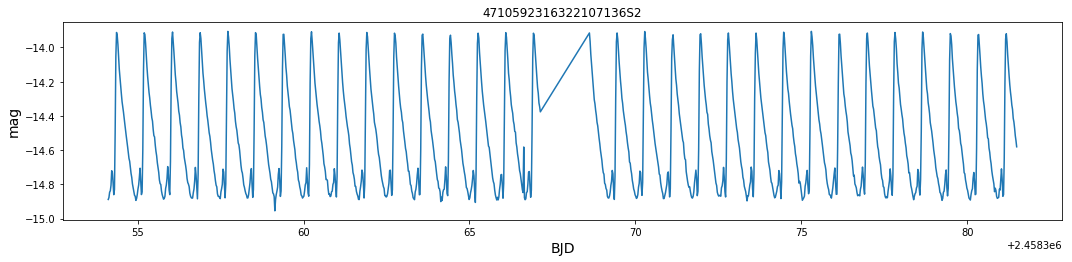

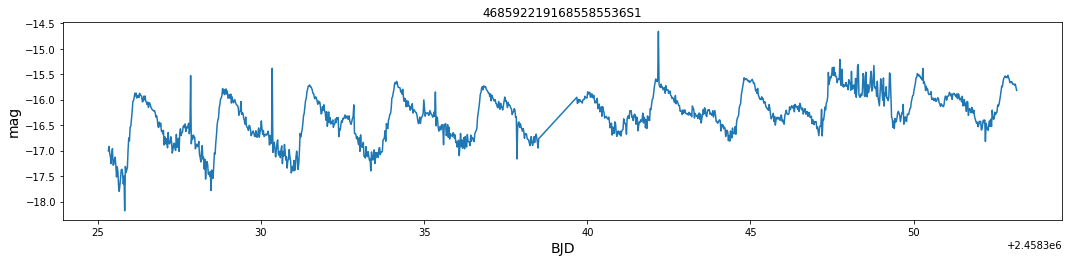

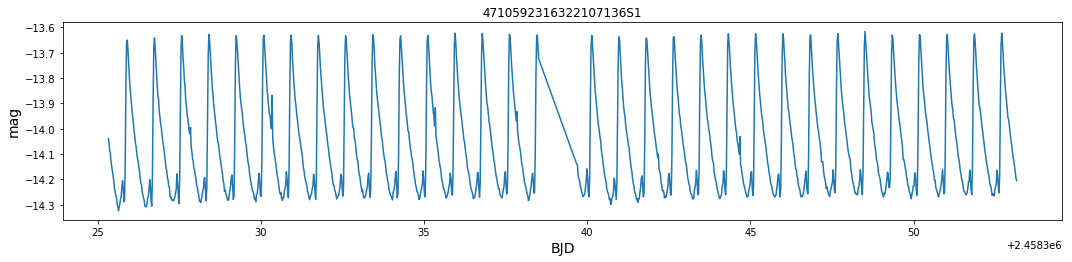

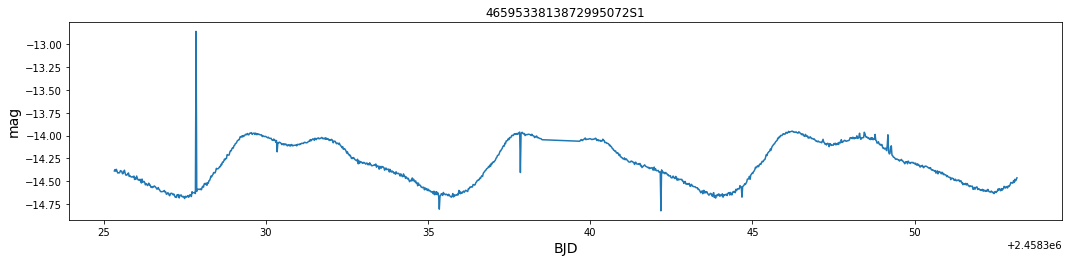

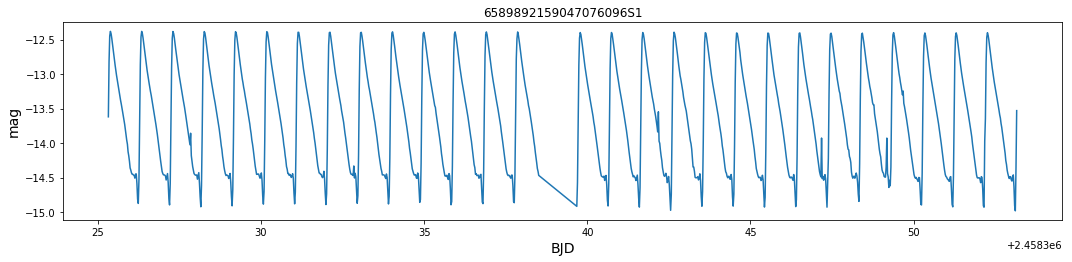

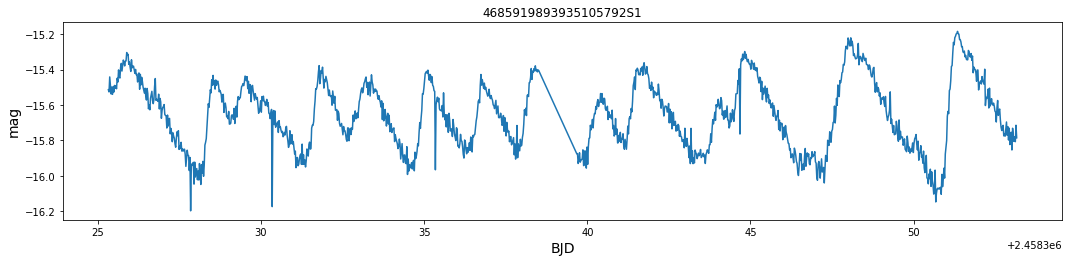

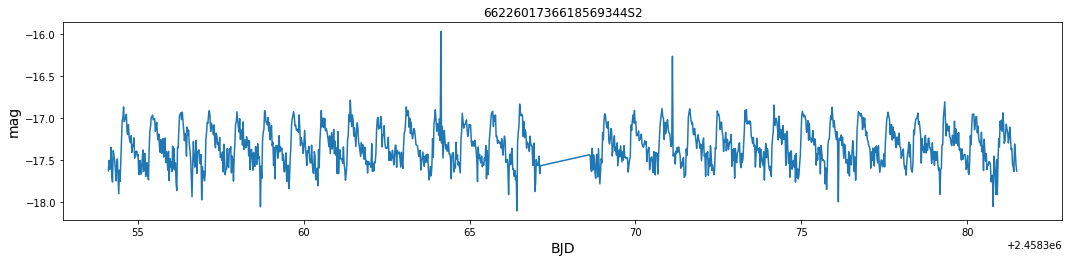

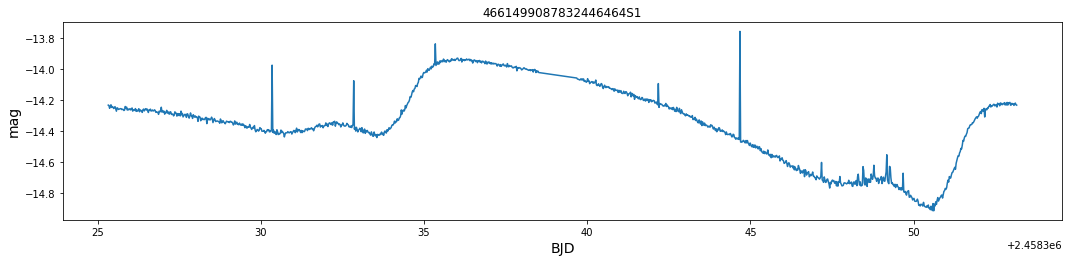

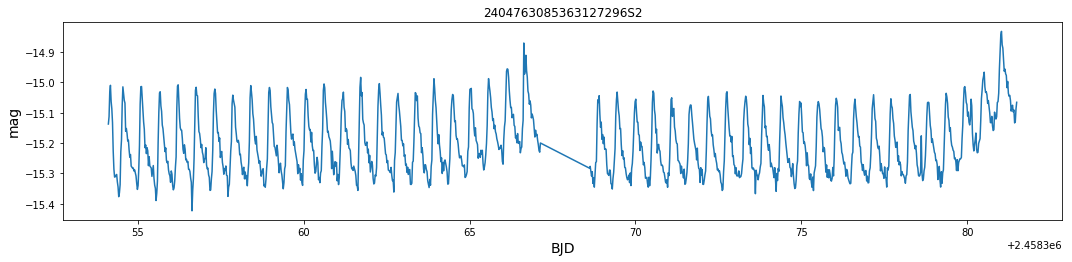

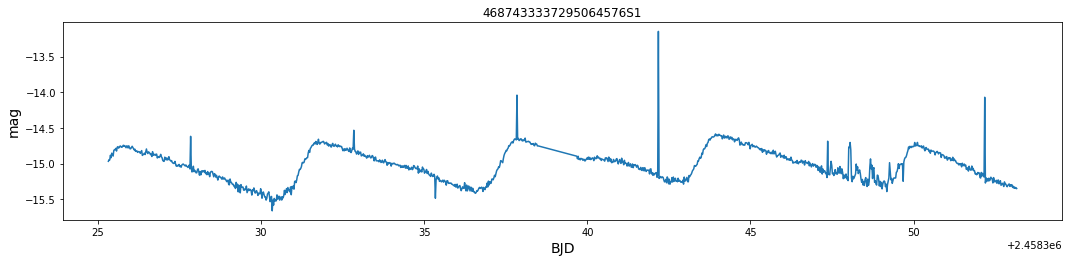

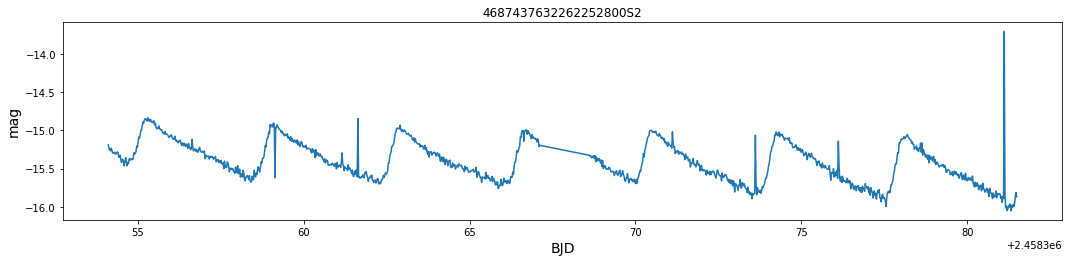

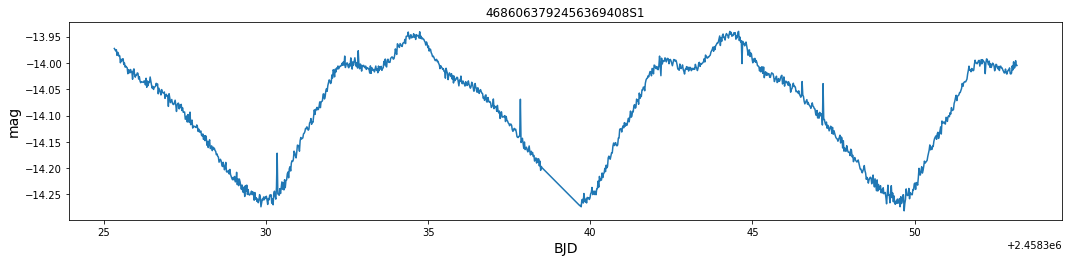

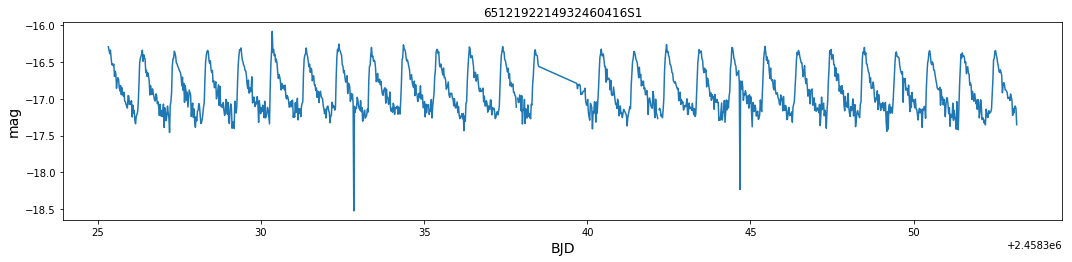

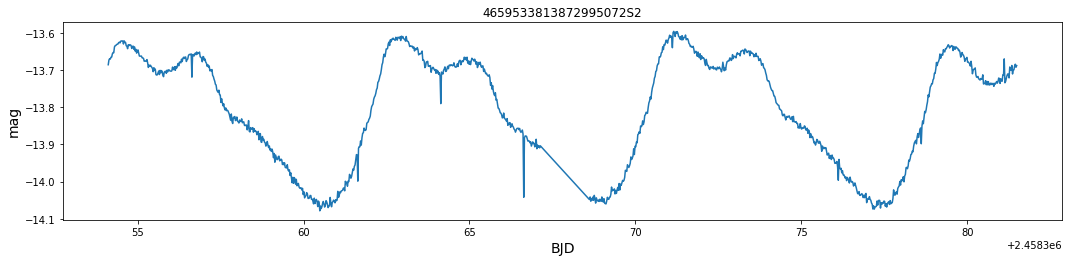

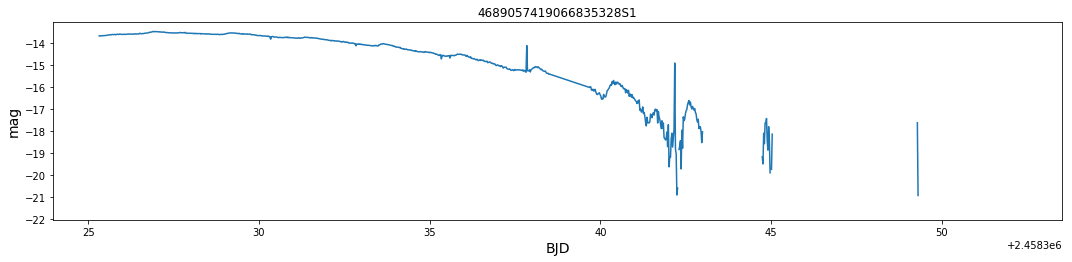

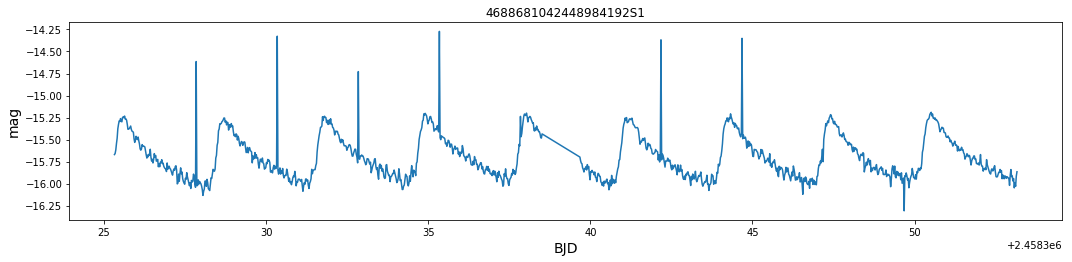

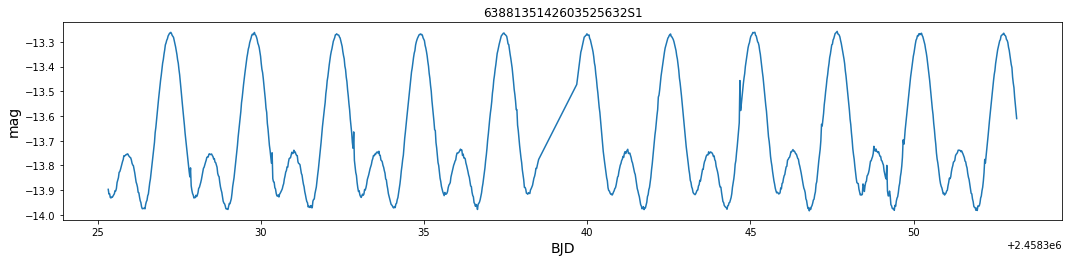

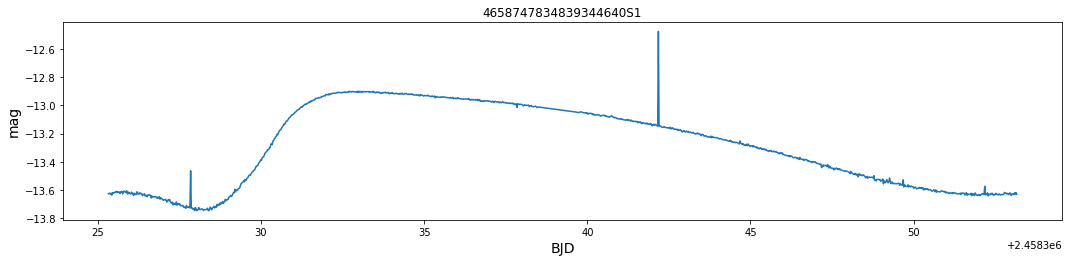

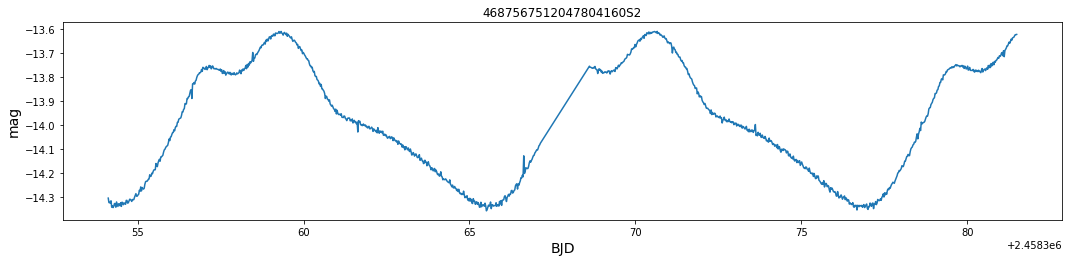

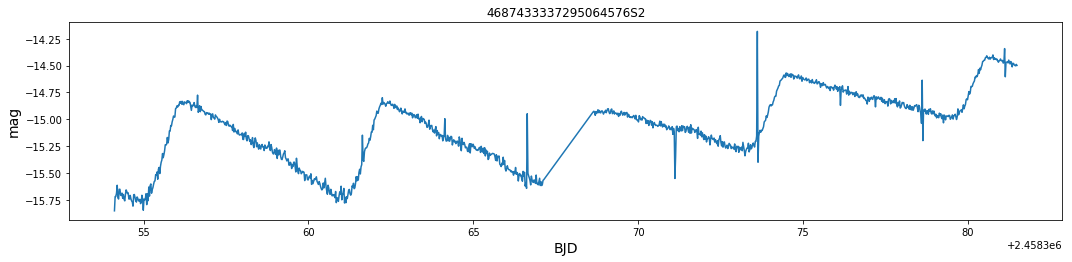

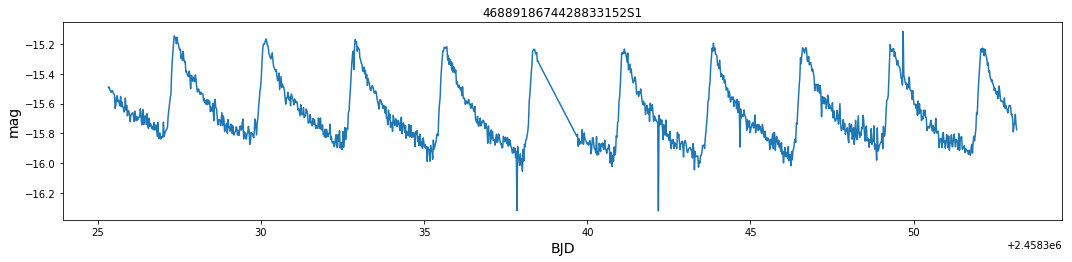

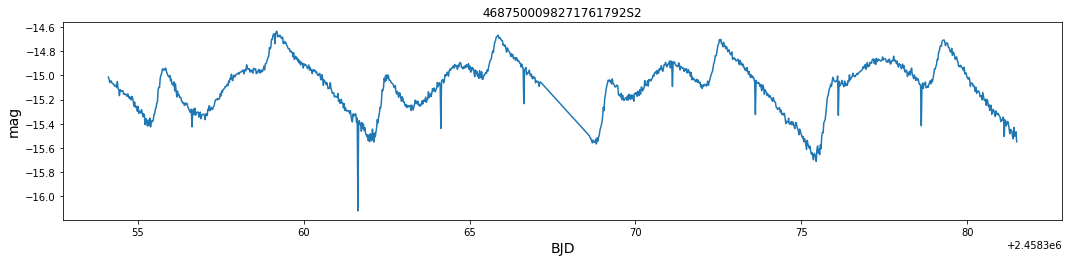

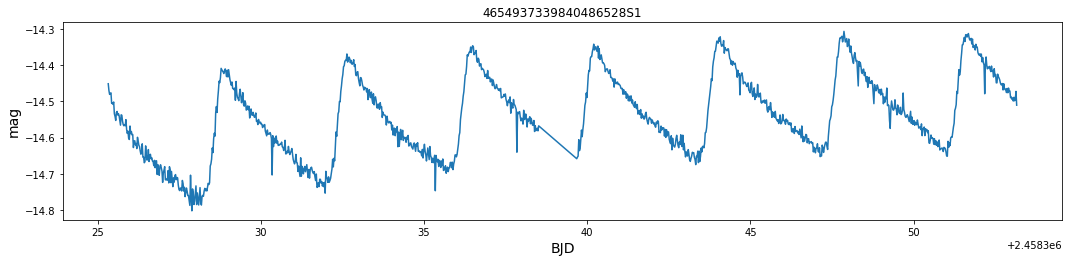

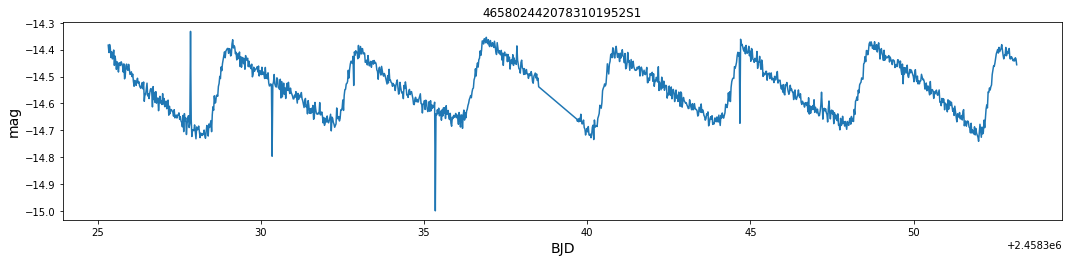

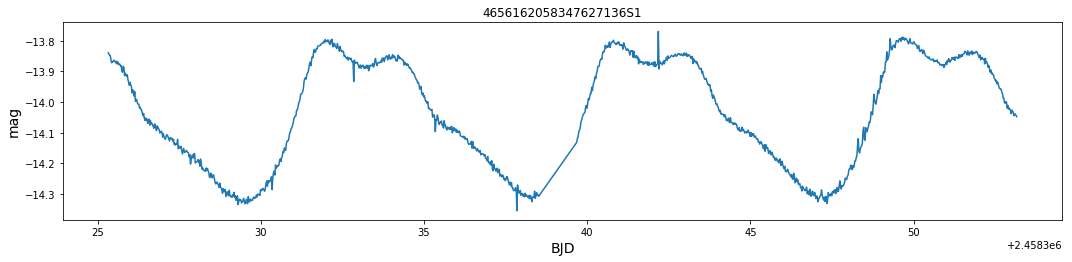

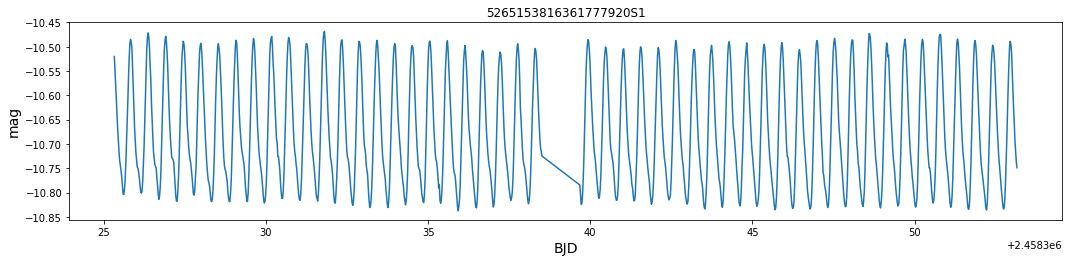

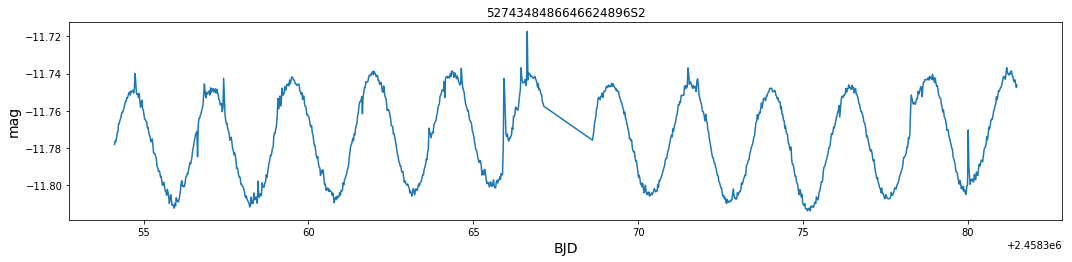

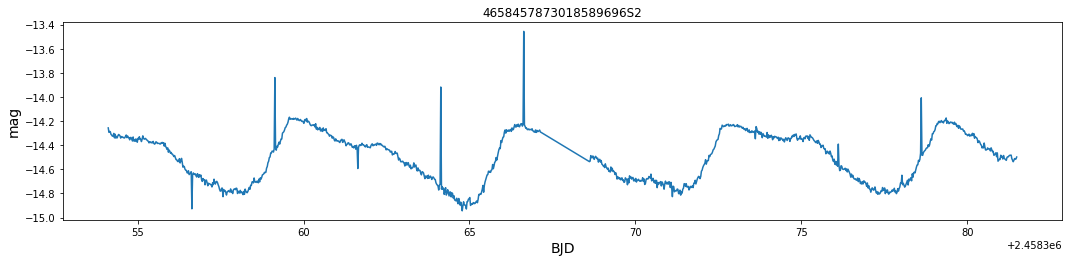

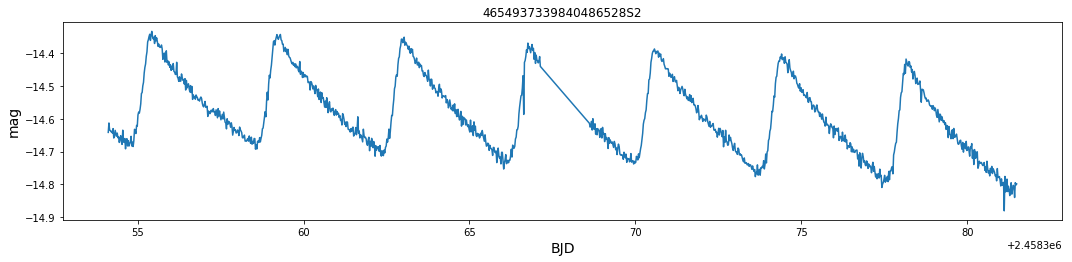

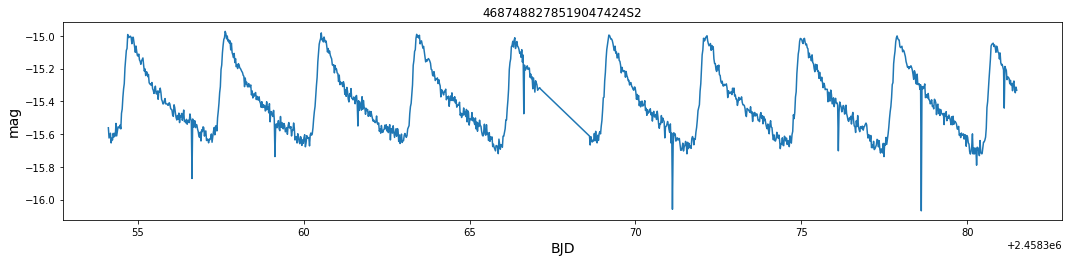

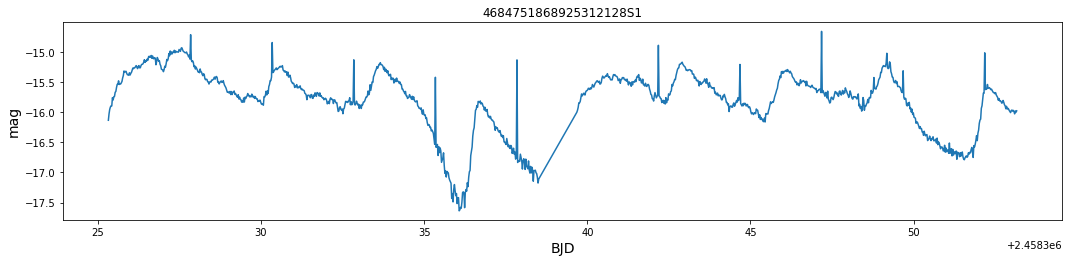

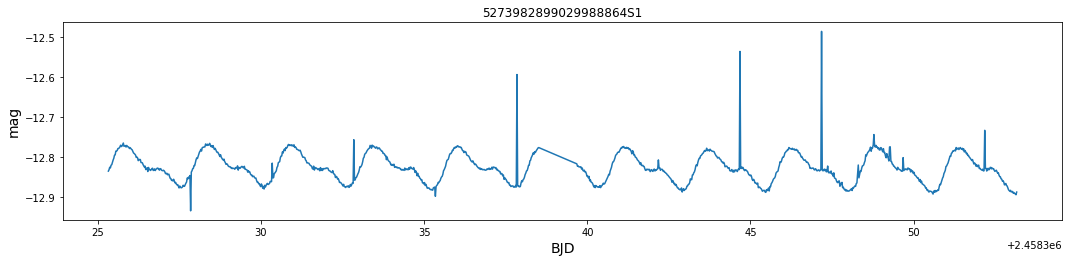

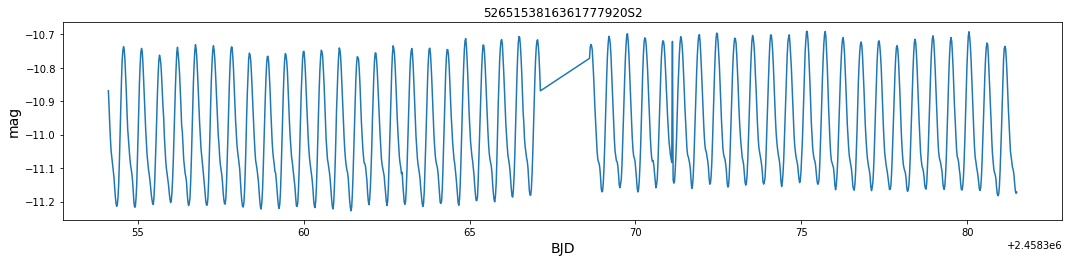

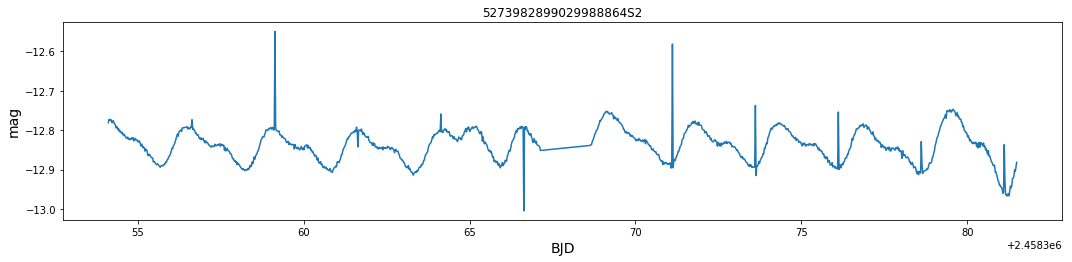

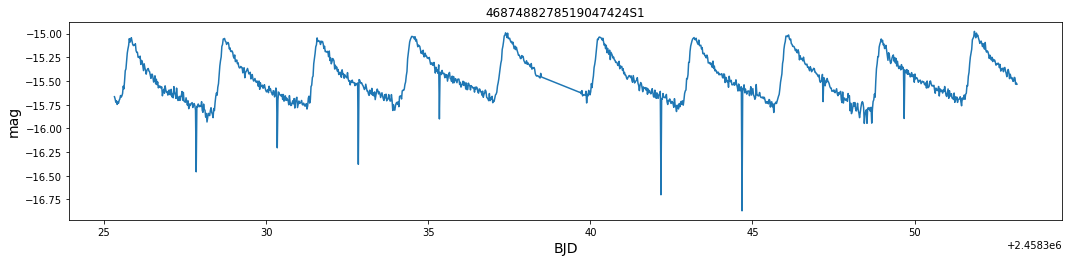

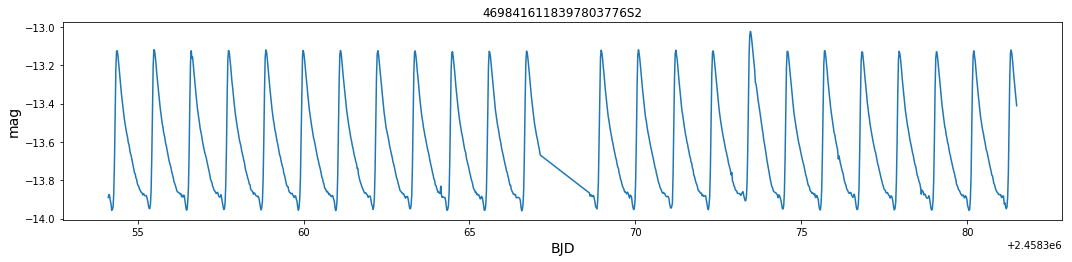

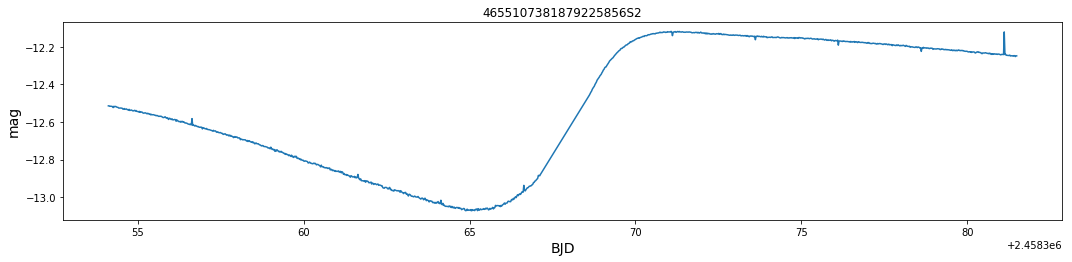

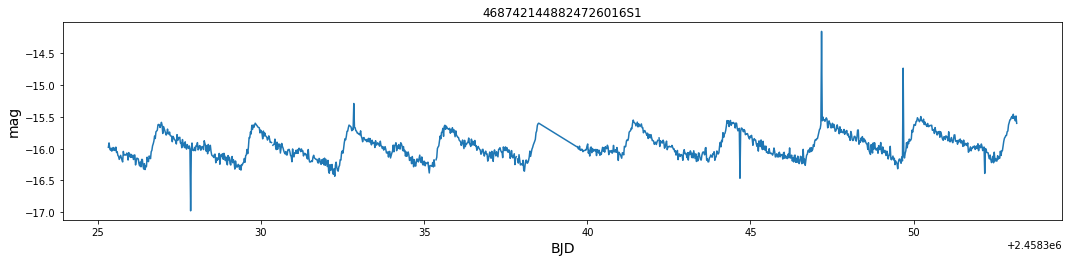

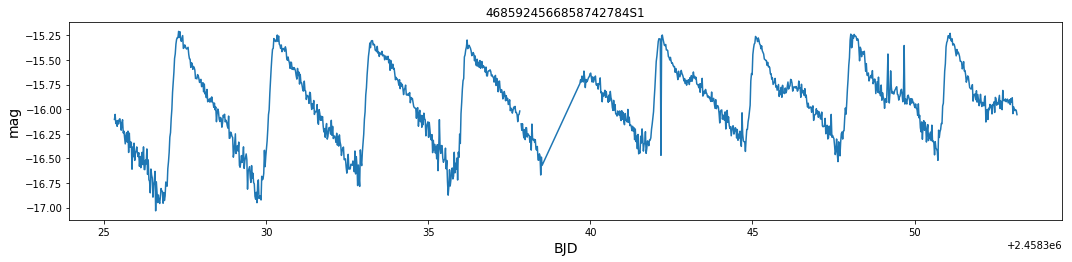

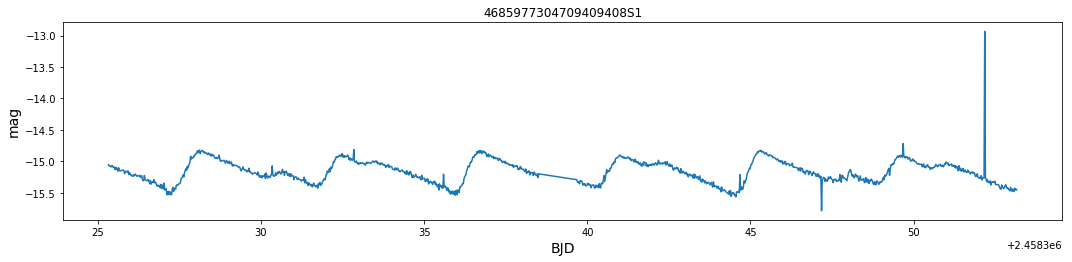

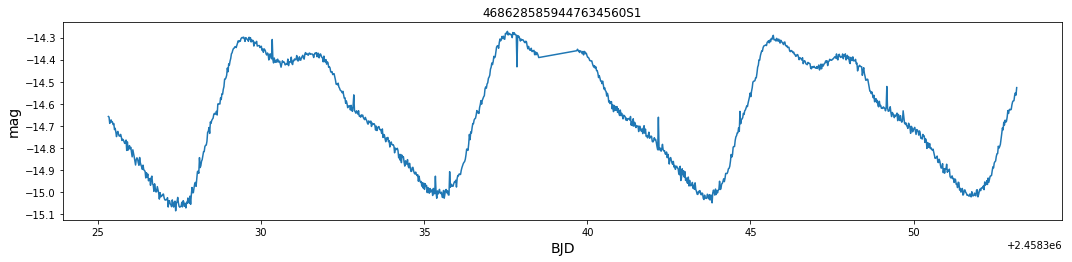

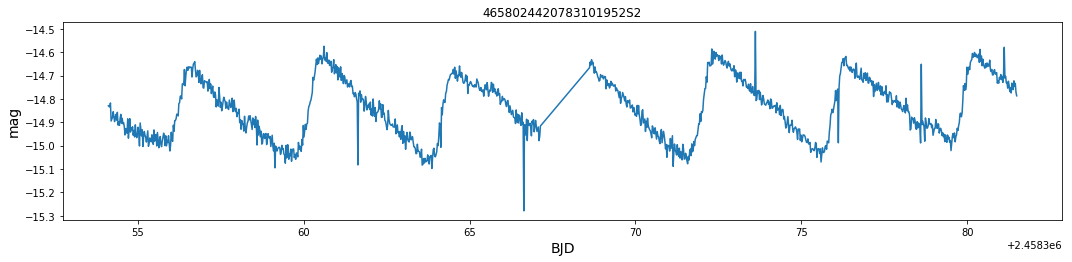

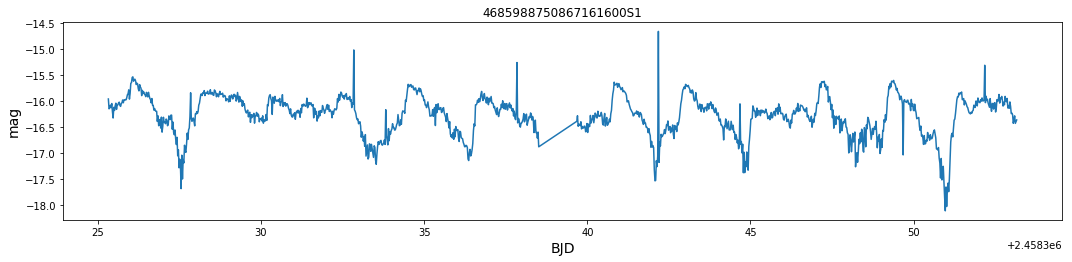

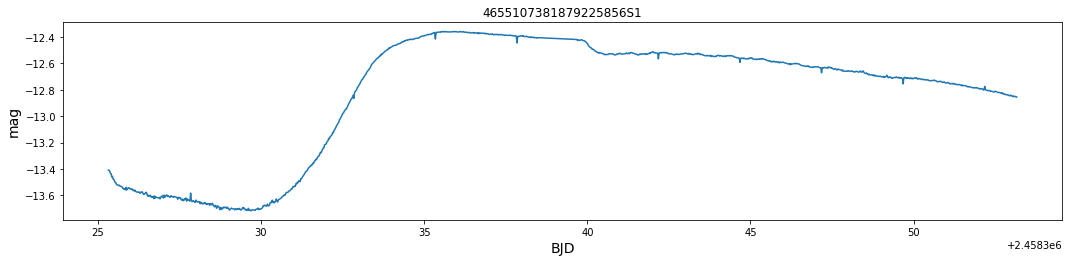

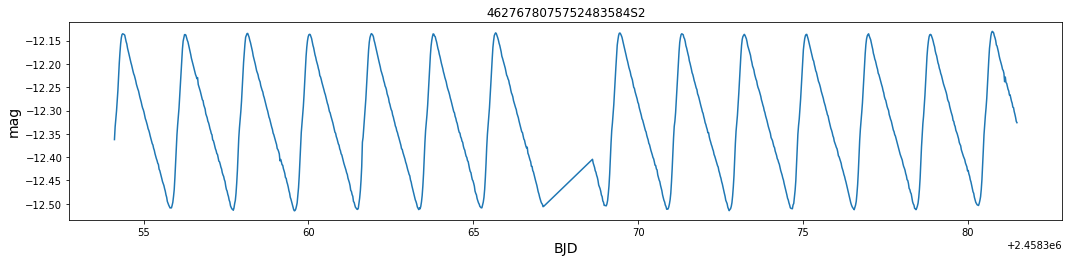

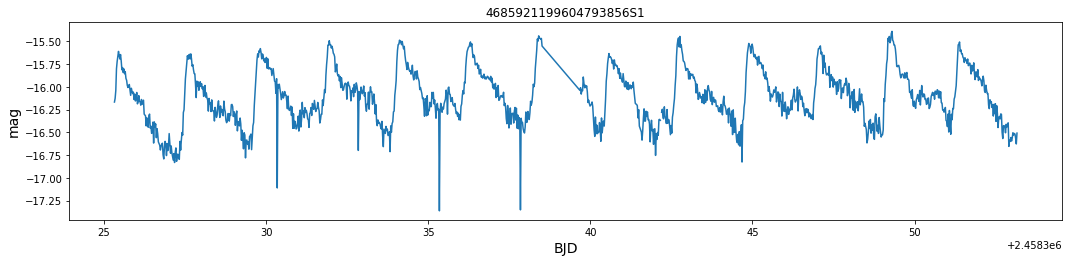

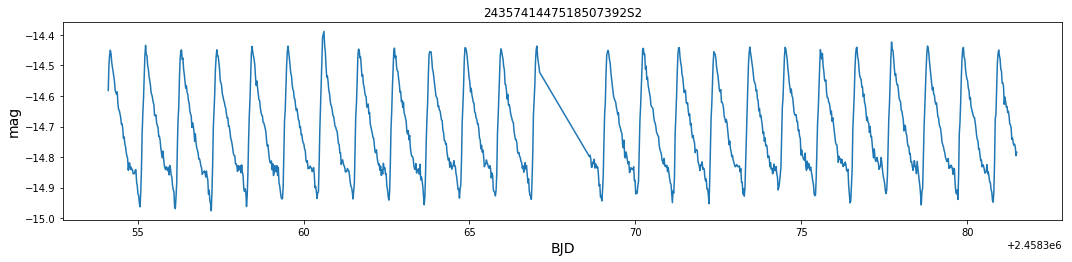

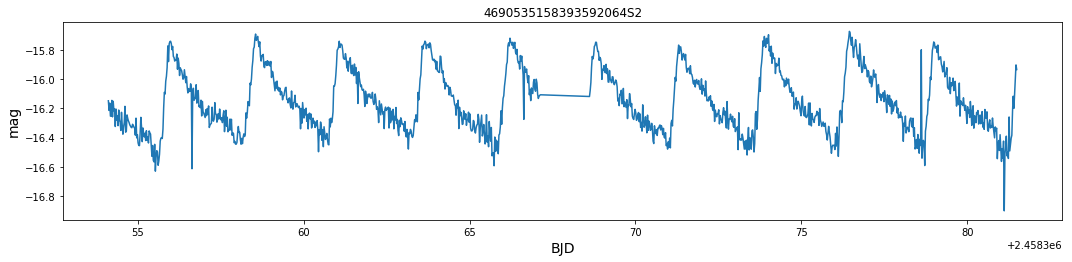

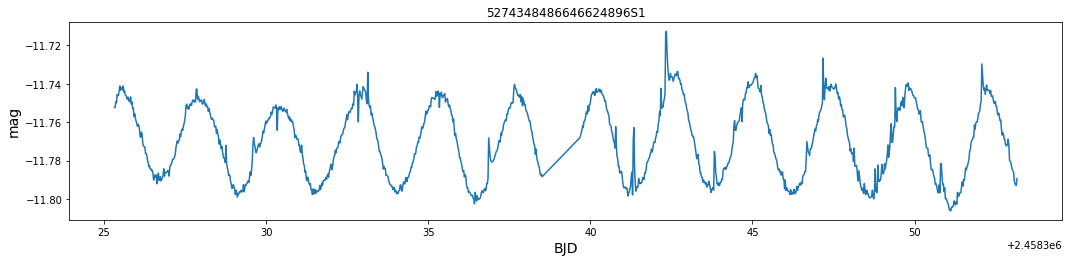

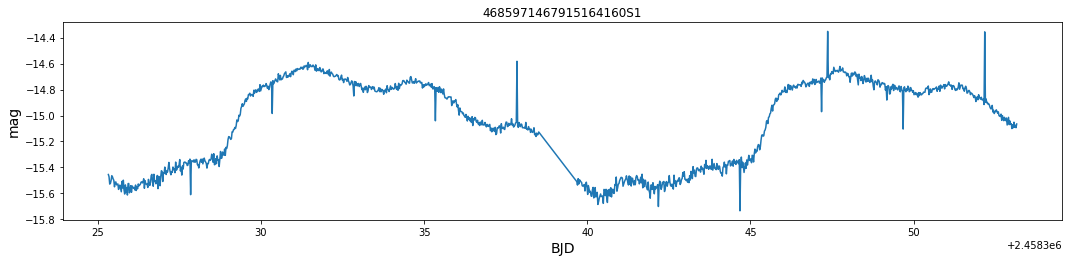

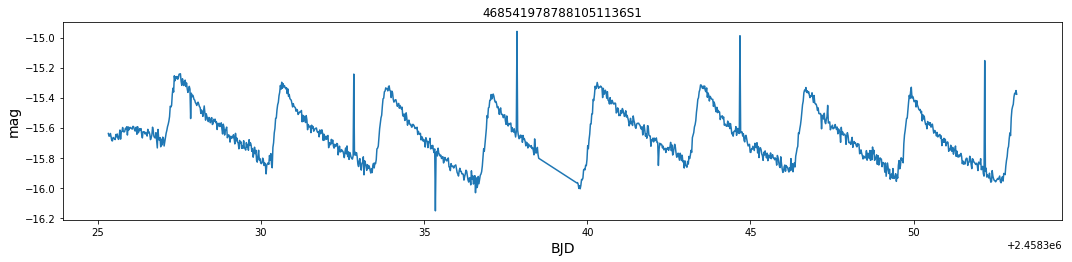

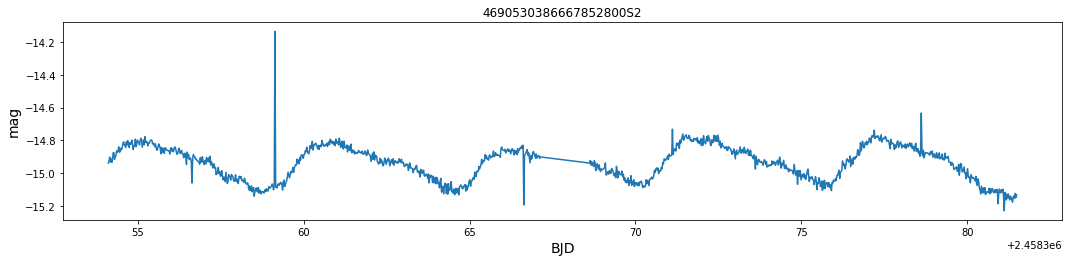

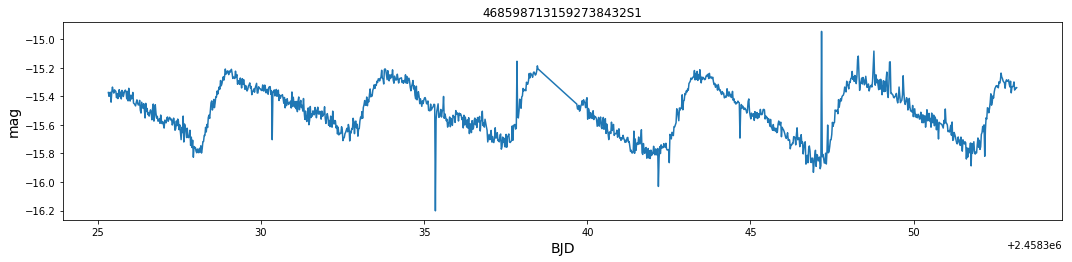

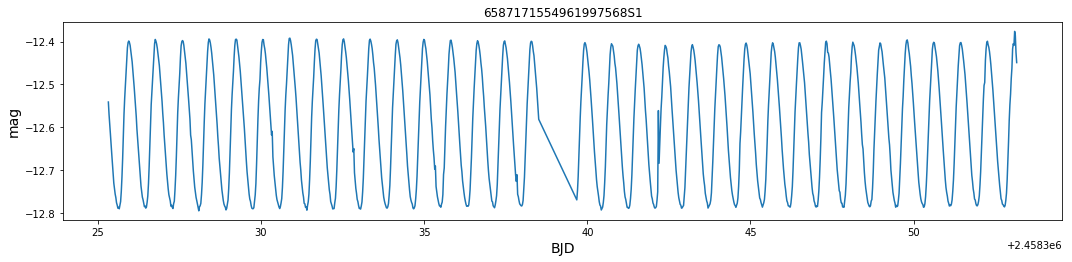

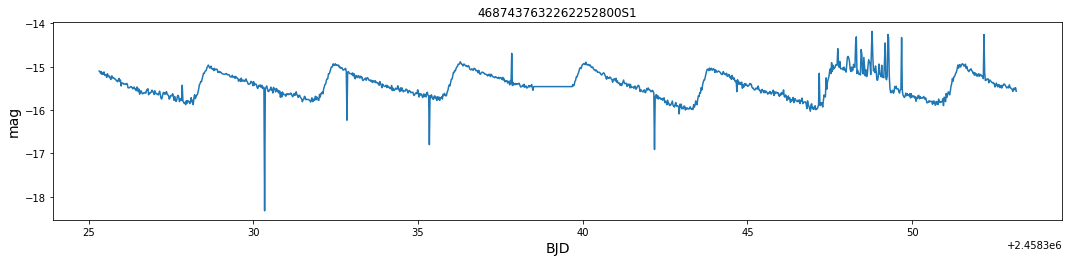

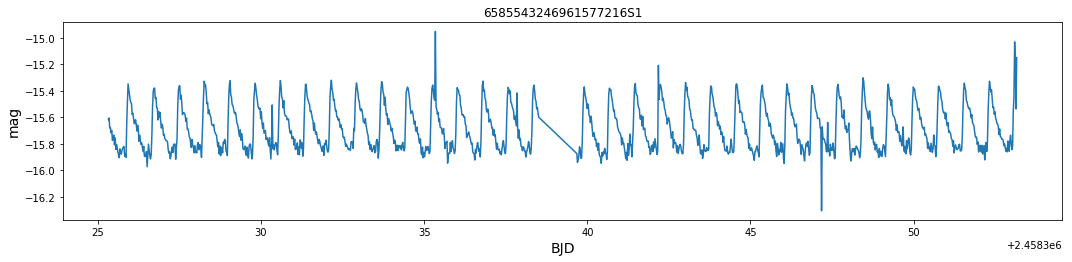

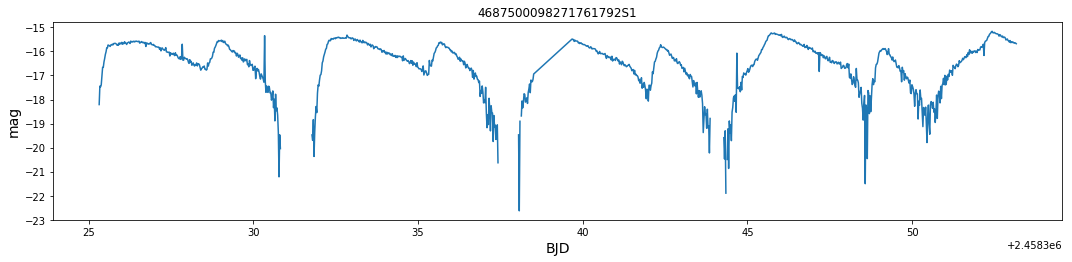

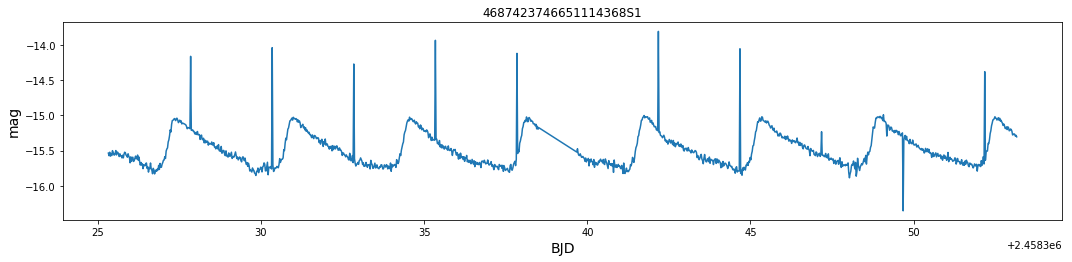

In [114]:
for each in glob.glob("*lc.lc"):
    BJD=np.genfromtxt(each)[:,1]
    magn=-np.genfromtxt(each)[:,4]
    plt.figure(figsize=(15,3.75))
    plt.plot(BJD,magn)
    plt.title(each[0:-5])
    plt.xlabel("BJD",fontsize=14)
    plt.ylabel("mag",fontsize=14)
    plt.tight_layout()